# 1.) Import the Credit Card Fraud Data From CCLE

In [1]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [ ]:
df=pd.read_csv("/content/gdrive/MyDrive/ECON441B/fraudTest.csv")

In [ ]:
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

# 2.) Select four columns to use as features (one just be trans_date_trans)

In [ ]:
df_select=df[["trans_date_trans_time","category","amt","city_pop","is_fraud"]]

In [ ]:
df_select.columns

Index(['trans_date_trans_time', 'category', 'amt', 'city_pop', 'is_fraud'], dtype='object')

# 3.) Create a unique variable out of trans_date.

In [ ]:
df_select["trans_date_trans_time"]=pd.to_datetime(df_select["trans_date_trans_time"])

<ipython-input-284-cb52e57ab9df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["trans_date_trans_time"]=pd.to_datetime(df_select["trans_date_trans_time"])


In [ ]:
df_select["trans_date_trans_time"][0]

Timestamp('2020-06-21 12:14:25')

In [ ]:
df_select["time_var"]=[i.second for i in df_select["trans_date_trans_time"]]

<ipython-input-286-51cb36a10634>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_select["time_var"]=[i.second for i in df_select["trans_date_trans_time"]]


In [ ]:
X=pd.get_dummies(df_select,["category"]).drop(["trans_date_trans_time","is_fraud"],axis=1)
y=df_select["is_fraud"]
X.head()

,amt,city_pop,time_var,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,2.86,333497,25,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,29.84,302,33,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,41.28,34496,53,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,60.05,54767,15,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,3.19,1126,17,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True)

# XXXXXX SKIP THIS WE WILL TALK ABOUT NEXT CLASS 4.) Oversample the data (this will be your training data).XXXXXX

# 5.) Train a Logistic regression.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.fit_transform(X_test)
log_reg=LogisticRegression().fit(X_train_scale,y_train)

# 6.) The company you are working for wants to target at a False Positive rate of 5% what threshold should you use? (Use oversampled data)

In [ ]:
from sklearn.metrics import confusion_matrix
desired_fp_percentage=5

#### To find the threshold with False Positive rate closest to 5% between 0 and 1 with step of 0.01.

In [ ]:
threshold=np.arange(0,1,0.01)
y_pred_proba=log_reg.predict_proba(X_test_scale)[:,1]
c1=[]
c2=[]
for i in threshold:
  y_pred_new=(y_pred_proba>i).astype(int)
  cm_new=confusion_matrix(y_test,y_pred_new)
  tn_new,fp_new,fn_new,tp_new=cm_new.ravel()
  c1.append(i)
  c2.append((fp_new/(fp_new+tn_new))*100)
df_threshold=pd.DataFrame({"threshold":c1,"fpr":c2})
df_threshold["diff"]=abs(df_threshold["fpr"]-5.0)
df_threshold

,threshold,fpr,diff
0,0.00,100.000000,95.000000
1,0.01,4.279532,0.720468
2,0.02,0.454470,4.545530
3,0.03,0.261555,4.738445
4,0.04,0.184967,4.815033
...,...,...,...
95,0.95,0.008670,4.991330
96,0.96,0.007225,4.992775
97,0.97,0.007225,4.992775
98,0.98,0.005058,4.994942


In [ ]:
df_threshold[df_threshold['diff']==df_threshold['diff'].min()]

,threshold,fpr,diff
1,0.01,4.279532,0.720468


#### To find the threshold with False Positive rate closest to 5% between 0 and 0.01 with step of 0.00001

In [ ]:
df_threshold=df_threshold[df_threshold['diff']==df_threshold['diff'].min()]
endpoint=df_threshold["threshold"].iloc[0]
threshold=np.arange(0,endpoint,0.00001)
c1=[]
c2=[]
for i in threshold:
  y_pred_new=(y_pred_proba>i).astype(int)
  cm_new=confusion_matrix(y_test,y_pred_new)
  tn_new,fp_new,fn_new,tp_new=cm_new.ravel()
  c1.append(i)
  c2.append((fp_new/(fp_new+tn_new))*100)
df_threshold=pd.DataFrame({"threshold":c1,"fpr":c2})
df_threshold["diff"]=abs(df_threshold["fpr"]-5.0)
df_threshold

,threshold,fpr,diff
0,0.00000,100.000000,95.000000
1,0.00001,97.369999,92.369999
2,0.00002,97.315810,92.315810
3,0.00003,96.995007,91.995007
4,0.00004,96.962494,91.962494
...,...,...,...
995,0.00995,4.421147,0.578853
996,0.00996,4.385743,0.614257
997,0.00997,4.359732,0.640268
998,0.00998,4.332999,0.667001


In [ ]:
df_threshold=df_threshold[df_threshold['diff']==df_threshold['diff'].min()]
df_threshold

,threshold,fpr,diff
979,0.00979,4.984719,0.015281


#### Another one method to get optimal threshold

In [ ]:
from sklearn.metrics import roc_curve,auc
y_pred_proba=log_reg.predict_proba(X_test_scale)[:,1]
fpr,tpr,threshold=roc_curve(y_test,y_pred_proba)
threshold=threshold[np.argmin(np.abs(fpr-0.050000))]
y_pred_new=(y_pred_proba>threshold).astype(int)
cm_new=confusion_matrix(y_test,y_pred_new)
tn_new,fp_new,fn_new,tp_new=cm_new.ravel()
print("threshold:",threshold)
print("FPR:",fp_new/(fp_new+tn_new)*100)

threshold: 0.009909274065661007
FPR: 4.968634366327475


#### Threshold of 0.00979 has the False Positive Rate of 4.98%, closest to 5%, so I choose 0.00979 as my threshold.

# 7.) If the company makes .02*amt on True transactions and loses -amt on False (Use original data)

#### If the threshold is 0.5

In [ ]:
df_temp=df_select.copy()
X=pd.get_dummies(df_temp,["category"]).drop(["trans_date_trans_time","is_fraud"],axis=1)
y=df_temp["is_fraud"]
X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True)
scaler=StandardScaler()
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.fit_transform(X)
log_reg=LogisticRegression().fit(X_train_scale,y_train)
y_pred=log_reg.predict(X_test_scale)
df_res=pd.DataFrame()
df_res["is_fraud"]=y
df_res["predict"]=y_pred
df_res["amt"]=X["amt"]
df_res.head()

,is_fraud,predict,amt
0,0,0,2.86
1,0,0,29.84
2,0,0,41.28
3,0,0,60.05
4,0,0,3.19


In [ ]:
fn_amt=df_res[(df_res["is_fraud"]==1)&(df_res["predict"]==0)].amt.sum()
tp_amt=df_res[(df_res["is_fraud"]==1)&(df_res["predict"]==1)].amt.sum()#(0,0)
profit=0.02*tp_amt-fn_amt
print("The profit is ",profit)

The profit is  -1133324.6800000002


# 8.) Using Logistic Regression Lasso to inform you. Would you use the selected features in a trusted prediction model?

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,shuffle=True)
X_train_scale=scaler.fit_transform(X_train)
X_test_scale=scaler.fit_transform(X_test)
result=LogisticRegression(penalty="l1",solver='liblinear').fit(X_train_scale,y_train)
result.coef_[0]

array([ 0.33567772, -0.14876313,  0.04004005, -0.10063724, -0.09829708,
        0.08467936,  0.0093412 ,  0.41628465, -0.10777629, -0.12852363,
       -0.14455762,  0.29230542,  0.        , -0.01849643,  0.38707526,
        0.08043685, -1.01473141])

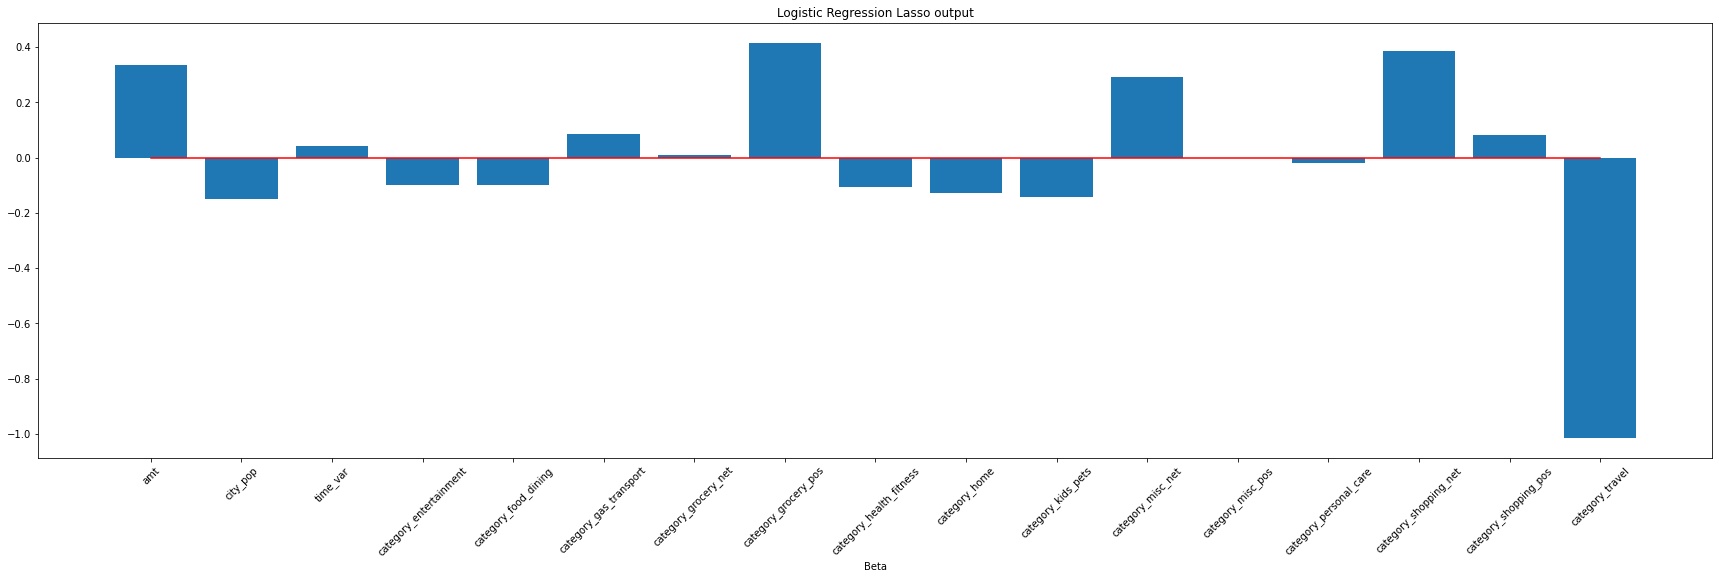

In [ ]:
plt.figure(figsize=(30,8))
plt.bar(X.columns,result.coef_[0])
plt.plot(X.columns, [0]*len(X.columns), c = "red")
plt.title("Logistic Regression Lasso output")
plt.xlabel("Beta")
plt.xticks(rotation=45)
plt.show()

In [ ]:
print("Score:",result.score(X_test_scale,y_test))

Score: 0.9956884762110415


#### The coefficients for the selected features are not all zero and the large model score which is similar to R-squared is 0.996, meaning that this prediction model is significant and good to be trusted.